In [1]:
import tensorflow

In [2]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [10]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

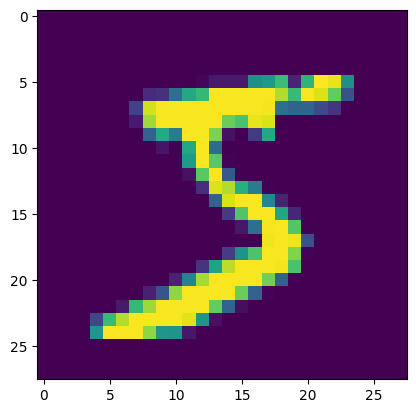

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [16]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.1425 - val_accuracy: 0.9747
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.1316 - val_accuracy: 0.9775
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1265 - val_accuracy: 0.9772
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.1359 - val_accuracy: 0.9768
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.1296 - val_accuracy: 0.9787
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.1307 - val_accuracy: 0.9776
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.1488 - val_accurac

In [31]:
y_pred=model.predict(X_test)
y_pred=y_pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_pred,y_test)

0.977

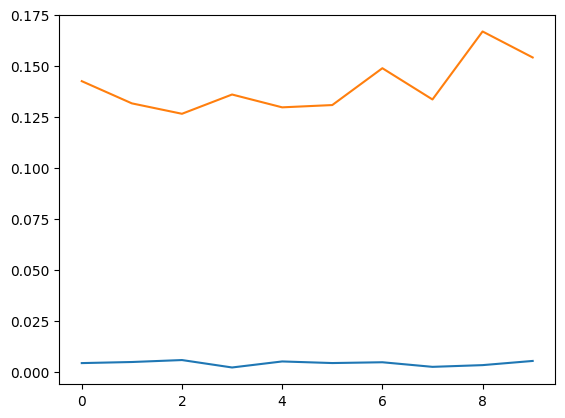

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

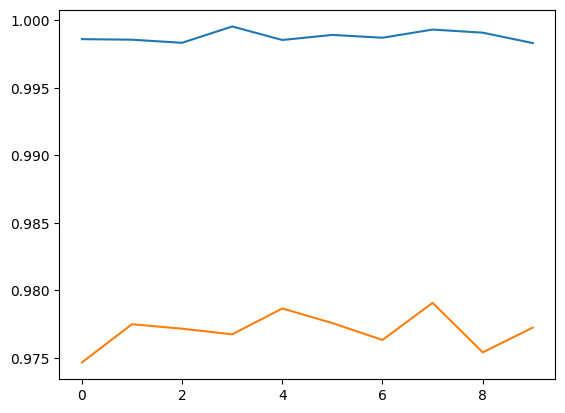

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [38]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)[0]

1/1 [==============================] - 0s 51ms/step


7